In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("cluster.csv", header=None, sep=',')
df.columns = 'x1', 'x2', 'class'
set(df['class'].values)
X = df.drop('class', axis=1)

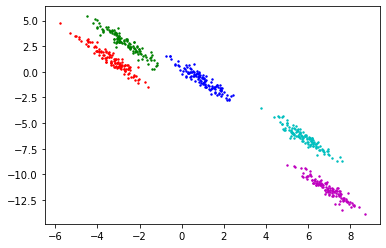

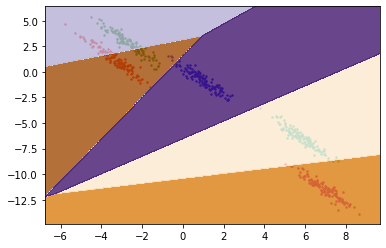

In [10]:
from sklearn.cluster import KMeans
clst = KMeans(n_clusters=5, random_state=42).fit(X)



def clusterise(clst, X, draw_cluster_centers=False):
    h = .02
    x_min, x_max = np.array(X)[:, 0].min() - 1, np.array(X)[:, 0].max() + 1
    y_min, y_max = np.array(X)[:, 1].min() - 1, np.array(X)[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    Z = clst.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots(1)
    colors = ['r','g','blue','m','c']
    for key,value in df.groupby('class'):
        plt.scatter(value.values[:,0], value.values[:,1], color=colors[int(key)], s=2)

    plt.show()
    if(draw_cluster_centers):
        centroids = clst.cluster_centers_
        plt.scatter(centroids[:,0], centroids[:,1], color=colors, s =500)
    for key,value in df.groupby('class'):
        plt.scatter(value.values[:,0], value.values[:,1], color=colors[int(key)], s=2)
    plt.contourf(xx, yy, Z, cmap='PuOr',alpha=0.8)
    plt.show()

clusterise(clst, X)

In [17]:
ow()

SyntaxError: invalid syntax (<ipython-input-17-254d2977181c>, line 5)

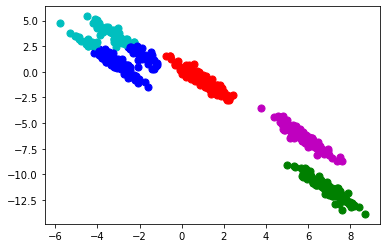

In [27]:
from sklearn.cluster import AgglomerativeClustering

clst = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward').fit(X)
labels = clst.labels_
colors = ['r','g','blue','m','c']

for i in range(len(X.values)):
    plt.scatter(X.values[i, 0], X.values[i,1], s=50, marker='o', color=colors[labels[i]])

plt.show()